# Exercise 4

#Kiwi Images

In [9]:
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse
import time
import random

def download_kiwi_images(search_term='kiwi fruit', max_images=100, output_folder='kiwi_images'):
    """
    Download JPEG images of kiwi (fruit or bird) from the web.

    Args:
        search_term (str): Specify 'kiwi fruit' or 'kiwi bird' to get specific results
        max_images (int): Maximum number of images to download
        output_folder (str): Folder to save images to

    Returns:
        int: Number of images successfully downloaded
    """
    # Create output directory if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Prepare search query for Google Images
    search_query = search_term.replace(' ', '+')

    # User agent to avoid being blocked
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    # Search URLs to try
    search_urls = [
        f"https://www.google.com/search?q={search_query}&tbm=isch",
        f"https://www.bing.com/images/search?q={search_query}",
        f"https://search.yahoo.com/images/search?p={search_query}"
    ]

    count = 0

    for search_url in search_urls:
        if count >= max_images:
            break

        try:
            # Get search results page
            response = requests.get(search_url, headers=headers)
            if response.status_code != 200:
                print(f"Failed to retrieve search results from {search_url}")
                continue

            # Parse the page
            soup = BeautifulSoup(response.text, 'html.parser')

            # Find image elements - different sites have different structures
            img_tags = soup.find_all('img')

            for img in img_tags:
                if count >= max_images:
                    break

                # Try to get image URL from different attributes
                img_url = None
                for attr in ['src', 'data-src', 'data-srcset', 'srcset']:
                    if img.get(attr):
                        img_url = img[attr]
                        break

                if not img_url:
                    continue

                # Handle relative URLs
                if not img_url.startswith(('http://', 'https://')):
                    img_url = urljoin(search_url, img_url)

                # Skip small icons and buttons
                if 'icon' in img_url.lower() or 'button' in img_url.lower():
                    continue

                # Only download JPEG images
                parsed_url = urlparse(img_url)
                path_lower = parsed_url.path.lower()
                if not (path_lower.endswith('.jpg') or path_lower.endswith('.jpeg')):
                    # Try content type for URLs without extensions
                    try:
                        img_response = requests.head(img_url, headers=headers, timeout=2)
                        content_type = img_response.headers.get('Content-Type', '')
                        if 'jpeg' not in content_type and 'jpg' not in content_type:
                            continue
                    except:
                        continue

                try:
                    # Download the image
                    img_response = requests.get(img_url, headers=headers, timeout=5)
                    if img_response.status_code != 200:
                        continue

                    # Verify it's actually a JPEG by checking headers
                    if 'image/jpeg' not in img_response.headers.get('Content-Type', ''):
                        continue

                    # Save the image
                    img_filename = os.path.join(output_folder, f'kiwi_{count+1}.jpg')
                    with open(img_filename, 'wb') as f:
                        f.write(img_response.content)

                    print(f"Downloaded {img_filename}")
                    count += 1

                    # Be nice to the server with a small delay
                    time.sleep(random.uniform(0.5, 1.5))

                except Exception as e:
                    print(f"Error downloading {img_url}: {e}")
                    continue

        except Exception as e:
            print(f"Error processing {search_url}: {e}")

    print(f"Successfully downloaded {count} kiwi images to {output_folder}")
    return count

# Example usage
if __name__ == "__main__":
    # For kiwi fruit images
    download_kiwi_images(search_term='kiwi fruit', max_images=100, output_folder='kiwi_fruit_images')

Downloaded kiwi_fruit_images/kiwi_1.jpg
Downloaded kiwi_fruit_images/kiwi_2.jpg
Downloaded kiwi_fruit_images/kiwi_3.jpg
Downloaded kiwi_fruit_images/kiwi_4.jpg
Downloaded kiwi_fruit_images/kiwi_5.jpg
Downloaded kiwi_fruit_images/kiwi_6.jpg
Downloaded kiwi_fruit_images/kiwi_7.jpg
Downloaded kiwi_fruit_images/kiwi_8.jpg
Downloaded kiwi_fruit_images/kiwi_9.jpg
Downloaded kiwi_fruit_images/kiwi_10.jpg
Downloaded kiwi_fruit_images/kiwi_11.jpg
Downloaded kiwi_fruit_images/kiwi_12.jpg
Downloaded kiwi_fruit_images/kiwi_13.jpg
Downloaded kiwi_fruit_images/kiwi_14.jpg
Downloaded kiwi_fruit_images/kiwi_15.jpg
Downloaded kiwi_fruit_images/kiwi_16.jpg
Downloaded kiwi_fruit_images/kiwi_17.jpg
Downloaded kiwi_fruit_images/kiwi_18.jpg
Downloaded kiwi_fruit_images/kiwi_19.jpg
Downloaded kiwi_fruit_images/kiwi_20.jpg
Downloaded kiwi_fruit_images/kiwi_21.jpg
Downloaded kiwi_fruit_images/kiwi_22.jpg
Downloaded kiwi_fruit_images/kiwi_23.jpg
Downloaded kiwi_fruit_images/kiwi_24.jpg
Downloaded kiwi_fruit_ima


## Instructions


1. Collect **100-200 images** of the fruit
2. Split the collected images for train, test and validation. Please make sure that there are no duplicate images. Images that are used in train should not appear in test, validation and vice versa.
3. Combine the collected images together with the images of apple, orange and banana. They  are already available in the link below: https://github.com/robitussin/tensorflow_lite_projects/tree/main/images/fruits
4. Create and train a Convolutional Neural Network (CNN).
5. Save the model as **"model.tflite"**
6. Create a folder named **exercise_4** in your **CCDEPLRL_EXERCISES_COM222_ML** repository.
7. Upload the **python notebook (.ipynb)** and the **model (.tflite)** in the exercise_3 folder

Deadline of submission is on **April 22, 2025**

## Model

In [50]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-04-22 08:03:11--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 13.200.41.134, 13.200.41.135, 13.200.41.136, ...
Connecting to bitbucket.org (bitbucket.org)|13.200.41.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.1MB/s    in 6.2s    

2025-04-22 08:03:19 (16.2 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [51]:
!unzip fruits.zip

Archive:  fruits.zip
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.26.13 PM.png  
  inflating: __MACOSX/fruits/test/apple/._

In [52]:
import os
import shutil

# Create required directories for kiwi
for split in ['train', 'validation', 'test']:
    kiwi_dir = f"fruits/{split}/kiwi"
    if not os.path.exists(kiwi_dir):
        os.makedirs(kiwi_dir)

In [53]:
kiwi_source = "/content/kiwi_fruit_images"
if os.path.exists(kiwi_source):
    all_kiwi_images = [f for f in os.listdir(kiwi_source) if f.endswith(('.jpg', '.jpeg', '.png'))]
    total_images = len(all_kiwi_images)

    # Split images: 70% train, 15% validation, 15% test
    train_count = int(total_images * 0.7)
    val_count = int(total_images * 0.15)

    # Copy images to their respective directories
    for i, img in enumerate(all_kiwi_images):
        source_path = os.path.join(kiwi_source, img)
        if i < train_count:
            dest_path = f"fruits/train/kiwi/{img}"
        elif i < train_count + val_count:
            dest_path = f"fruits/validation/kiwi/{img}"
        else:
            dest_path = f"fruits/test/kiwi/{img}"
        shutil.copy(source_path, dest_path)

    print(f"Distributed {total_images} kiwi images: {train_count} for training, {val_count} for validation, {total_images - train_count - val_count} for testing")
else:
    print(f"Error: Source directory {kiwi_source} not found. Please ensure the kiwi images are in this location.")


Distributed 100 kiwi images: 70 for training, 15 for validation, 15 for testing


Import the libraries

In [54]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

Hyperparameters: Set the image size and batch size

In [55]:
img_height, img_width = 224, 224
batch_size = 32

In [56]:
# Data augmentation to create more training samples and improve generalization
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.2),
    layers.RandomContrast(0.2),
])

Split the images into train, validation and test

In [57]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 530 files belonging to 4 classes.
Found 81 files belonging to 4 classes.
Found 145 files belonging to 4 classes.


In [58]:
class_names = train_ds.class_names
num_classes = len(class_names)
print(f"Class names: {class_names}")
print(f"Total classes: {num_classes}")

Class names: ['apple', 'banana', 'kiwi', 'orange']
Total classes: 4


In [59]:
# Optimize data pipeline performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Display sample images from the dataset

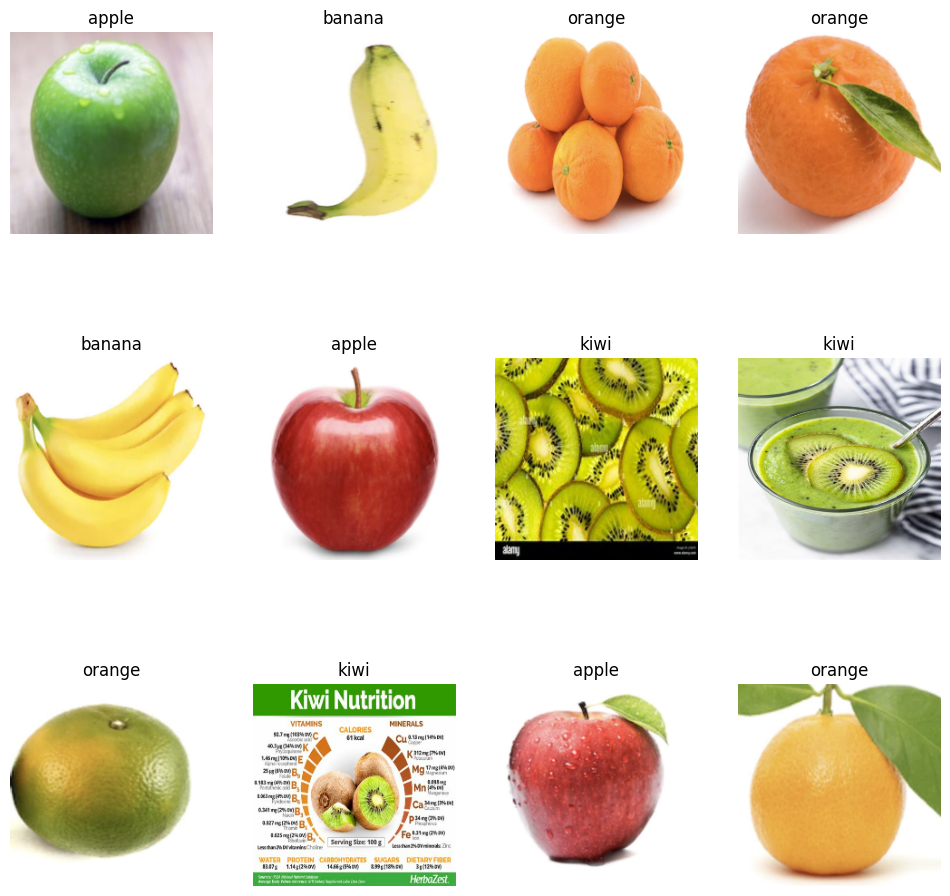

In [60]:
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(min(12, len(images))):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [61]:
# Create a function to apply data augmentation only to training data
def prepare_for_training(ds, augment=False):
    def augment_map_fn(x, y):
        x = data_augmentation(x)
        return x, y

    if augment:
        ds = ds.map(augment_map_fn, num_parallel_calls=AUTOTUNE)

    return ds

train_ds = prepare_for_training(train_ds, augment=True)

# Use transfer learning with MobileNetV2 as base model (pretrained on ImageNet)
base_model = MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)

In [62]:
# Freeze the base model layers
base_model.trainable = False

Create the Convolutional Neural Network Model (CNN)

In [63]:
model = models.Sequential([
    # Preprocessing layer
    layers.Rescaling(1./127.5, offset=-1),

    # Base model
    base_model,

    # Custom classification layers
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(num_classes)  # Ensure this matches the number of classes
])

Define the optimizer and loss function

In [64]:
# Compile with appropriate loss function and optimizer
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [65]:
# Display model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [66]:
# Define callbacks for better training
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1),
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
]

Train the model

In [67]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 597ms/step - accuracy: 0.5597 - loss: 1.2391
Epoch 1: val_accuracy improved from -inf to 0.95062, saving model to best_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5699 - loss: 1.2098 - val_accuracy: 0.9506 - val_loss: 0.1166 - learning_rate: 0.0010
Epoch 2/30
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.9641 - loss: 0.1335
Epoch 2: val_accuracy improved from 0.95062 to 0.97531, saving model to best_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 326ms/step - accuracy: 0.9648 - loss: 0.1309 - val_accuracy: 0.9753 - val_loss: 0.0491 - learning_rate: 0.0010
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.9652 - loss: 0.1034
Epoch 3: val_accuracy improved from 0.97531 to 0.98765, saving model to best_model.h5


17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 362ms/step - accuracy: 0.9656 - loss: 0.1027 - val_accuracy: 0.9877 - val_loss: 0.0377 - learning_rate: 0.0010
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.9550 - loss: 0.1168
Epoch 4: val_accuracy did not improve from 0.98765
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 267ms/step - accuracy: 0.9551 - loss: 0.1163 - val_accuracy: 0.9753 - val_loss: 0.0464 - learning_rate: 0.0010
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.9747 - loss: 0.0756
Epoch 5: val_accuracy did not improve from 0.98765
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 309ms/step - accuracy: 0.9748 - loss: 0.0748 - val_accuracy: 0.9877 - val_loss: 0.0383 - learning_rate: 0.0010
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.9723 - loss: 0.0678
Epoch 6: val_accuracy did not improve from 0.98765
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 272ms/step - accuracy: 0.9725 - loss: 0.0679 - val_accuracy: 0.9877 - val_loss: 0.0300 - learning_rate: 0.0010
Epoch 7/30
16/17 ━━━━━━

Test the model

In [68]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {test_accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.9921 - loss: 0.0346
Test accuracy: 0.9931


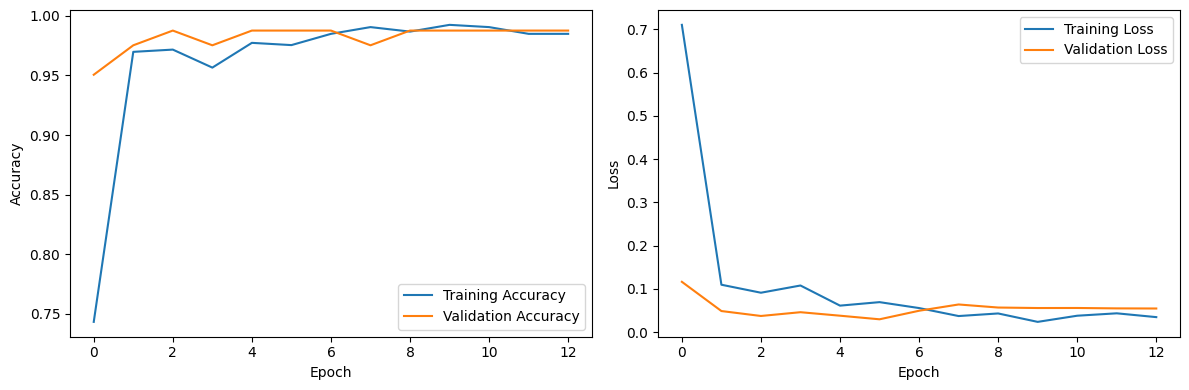

In [69]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
# If the accuracy isn't close to 100%, fine-tune the model
if test_accuracy < 0.95:
    print("Fine-tuning the model for better accuracy...")

    # Unfreeze the top layers of the base model
    base_model.trainable = True

    # Freeze first 100 layers
    for layer in base_model.layers[:100]:
        layer.trainable = False

    # Recompile with lower learning rate for fine-tuning
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )

    # Fine-tune the model
    fine_tune_history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=20,
        callbacks=callbacks
    )

    # Re-evaluate
    test_loss, test_accuracy = model.evaluate(test_ds)
    print(f"Test accuracy after fine-tuning: {test_accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


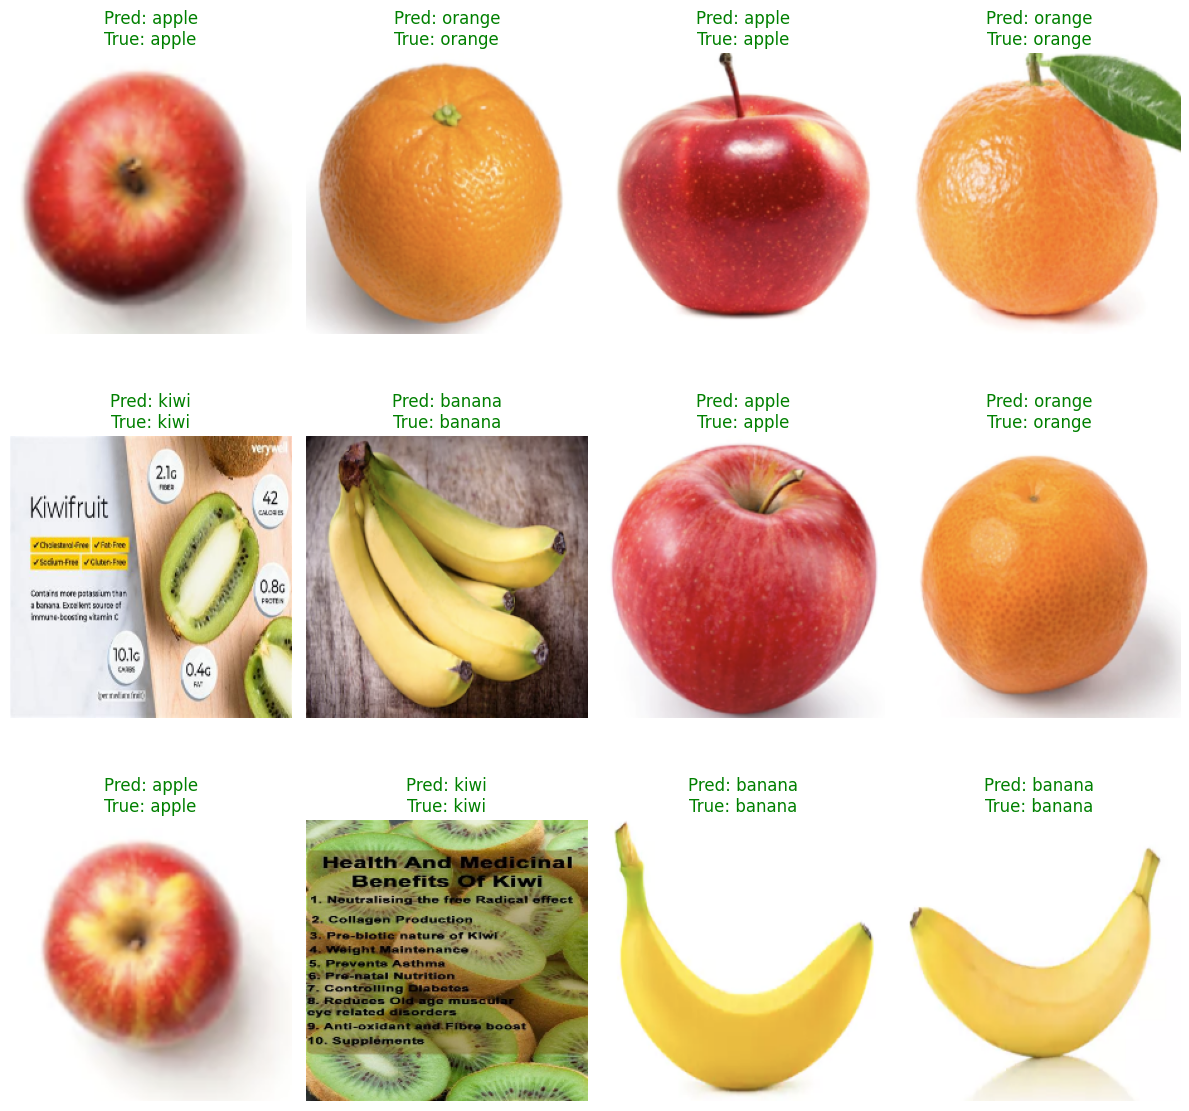

In [71]:
# Visualization of predictions
plt.figure(figsize=(12, 12))
for images, labels in test_ds.take(1):
    predictions = model.predict(images)

    for i in range(min(12, len(images))):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_index = np.argmax(predictions[i])
        true_index = labels[i].numpy()

        color = "green" if predicted_index == true_index else "red"
        plt.title(f"Pred: {class_names[predicted_index]}\nTrue: {class_names[true_index]}",
                  color=color)
        plt.axis("off")
plt.tight_layout()
plt.show()

Save the model

In [72]:
# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
with open("improved_model.tflite", 'wb') as f:
    f.write(tflite_model)

print("Model saved as 'improved_model.tflite'")

Saved artifact at '/tmp/tmpvmhz65cj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_489')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  137043185359504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137043185359696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137043656574352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137043652196496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137043185358928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137043656573200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137043656574736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137043656573776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137043656577040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137043656574160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1370436565